In [84]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',None)

In [85]:
#loading data set train and test
train = pd.read_excel('Final_Train.xlsx')
test = pd.read_excel('Final_Test.xlsx')
print( 'shape of Train data =' , train.shape ,'\n','shape of Test data =', test.shape)

shape of Train data = (5961, 7) 
 shape of Test data = (1987, 6)


In [86]:
#I will be merging both data set, but before that I will create a source column to identify test and train data
#and will set the fees column = 0 for test data
test['Fees'] = 0
test['source'] = 'test'
train['source'] = 'train'
df = pd.concat([train,test],ignore_index=True)

In [87]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb",250,train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,train


In [88]:
#now cleaning the df data set

#1st I will transform the Experiance column, I will replace ( years experience) with '' and change it to int data type
df['Experience'] = df['Experience'].str.replace(' years experience','').astype(int)

In [89]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,train
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb",250,train
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,train


In [90]:
#now I will fix Rating column by removing the % from every given value and set dtype into float
df['Rating'] = df['Rating'].str.replace('%','').astype(float)

In [91]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,train
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb",250,train
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,train


In [92]:
df['Miscellaneous_Info'].astype('str').dtypes

dtype('O')

In [93]:
df['Feedback'] = 1

In [94]:
for x in range(0,len(df['Miscellaneous_Info']) - 1):
   
    if type(df["Miscellaneous_Info"][x]) == float:
        df['Feedback'][x] = 0
    elif "Feedback" in df["Miscellaneous_Info"][x]:
        feedback_count_str = df["Miscellaneous_Info"][x].split("Feedback")[0].strip()
        if "%" in feedback_count_str:
            count = feedback_count_str.split("%")[1].strip()
            
            df['Feedback'][x] = count
        else:
#             dead code
            count = feedback_count_str.strip()
            df['Feedback'][x] = 0
    else:
        
        df['Feedback'][x] = 0

In [95]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,Feedback
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,train,16
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,train,76
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,train,0
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb",250,train,0
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,train,4


In [96]:
#now I will split values in Place colum by , and create 2 columns for these comma splitted values.
df['City'] = df['Place'].str.split(', ').str[-1]
df['Area'] = df['Place'].str.split(', ').str[0]

In [97]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,source,Feedback,City,Area
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,train,16,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,train,76,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,train,0,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on Sun, 10 Feb",250,train,0,Bangalore,Bannerghatta Road
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,train,4,Chennai,Keelkattalai


In [98]:
#now I will remove Place,Miscellaneous_Info columns from the data frame
df.drop(['Place','Miscellaneous_Info'],axis=1,inplace=True)

In [99]:
df['City'].value_counts()

Bangalore             1678
Mumbai                1608
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
e                        1
Name: City, dtype: int64

In [100]:
#here we can see that a city name e is there, I will replace this with mode value which is Banglore
def removethee(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [101]:
df['City']=df['City'].apply(removethee)

In [102]:
df['City'].value_counts()

Bangalore             1679
Mumbai                1608
Delhi                 1602
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
Name: City, dtype: int64

In [103]:
#now for Qualification, I will try to process the data with respect to the Profile.
#I will group data one by one wrt Profile and then find the Degree like BAMS, MBBS, MDS, BDS and 
#for each class I will be creating a column with binary values.

#1st I will create a data for Ayurveda then Dentist and so on.
#thanks to murali-munna's git hub repository 
 #https://github.com/murali-munna/MachineHack-Doctor-Fee-Prediction


In [104]:
#here we are inputting 1 in all the 3 col where profile is Ayurveda and the value in qualification matches the col.
#AYURVEDA
df['ayurveda_bams'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bBAMS\b'),1,0)
df['ayurveda_ms'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ayurveda_md'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['ayurveda_gams'] = np.where((df.Profile == 'Ayurveda') & df.Qualification.str.contains(r'\bGAMS\b'),1,0)

#DENTIST
df['dentist_bds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bBDS\b'),1,0)
df['dentist_mds'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bMDS\b'),1,0)
df['dentist_phd'] = np.where((df.Profile == 'Dentist') & df.Qualification.str.contains(r'\bPhD\b'),1,0)

#Dermatologists
#in Dentist profile there is a qualification value as (Get inspired by remarkable stories of people like you), 
#I will also try to remove such types of observation, as such observation have many missing data.

df['Dermatologists_mbbs'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bMBBS\b'),1,0)
df['Dermatologists_md'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['Dermatologists_dnb'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bDNB\b'),1,0)
df['Dermatologists_ddvl'] = np.where((df.Profile == 'Dermatologists') & df.Qualification.str.contains(r'\bDDVL\b'),1,0)

In [105]:
#ENT SPECIALIST
df['ent_ms'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'\bMS\b'),1,0)
df['ent_otorhinolaryngology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'otorhinolaryngology', case=False),1,0)
df['ent_oncology'] = np.where((df.Profile == 'ENT Specialist') & df.Qualification.str.contains(r'oncology', case=False),1,0)

In [106]:
# Homeopathy - BHMS, DHMS, MD
df['homeopath_bhms'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bBHMS\b'),1,0)
df['homeopath_dhms'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bDHMS\b'),1,0)
df['homeopath_md'] = np.where((df.Profile == 'Homeopath') & df.Qualification.str.contains(r'\bMD\b'),1,0)

In [107]:
#General medicine
df['gm_md'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'\bMD\b'),1,0)
df['gm_mbbs'] = np.where((df.Profile == 'General Medicine') & df.Qualification.str.contains(r'\bMBBS\b'),1,0)

In [108]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,source,Feedback,City,Area,ayurveda_bams,ayurveda_ms,ayurveda_md,ayurveda_gams,dentist_bds,dentist_mds,dentist_phd,Dermatologists_mbbs,Dermatologists_md,Dermatologists_dnb,Dermatologists_ddvl,ent_ms,ent_otorhinolaryngology,ent_oncology,homeopath_bhms,homeopath_dhms,homeopath_md,gm_md,gm_mbbs
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,100,train,16,Ernakulam,Kakkanad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,350,train,76,Bangalore,Whitefield,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,300,train,0,Bangalore,Mathikere - BEL,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,250,train,0,Bangalore,Bannerghatta Road,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BAMS,20,100.0,Ayurveda,250,train,4,Chennai,Keelkattalai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
#checking the Feedback column, how many 0 values are there
df['Feedback'].value_counts()

0       5896
4        102
3         98
5         92
1         86
2         81
7         73
8         68
10        67
13        66
12        65
9         64
11        62
6         53
14        46
17        40
15        36
19        35
16        35
18        30
21        29
20        27
23        26
29        26
28        24
24        20
25        19
26        19
35        17
33        16
39        15
42        15
32        14
34        13
36        13
31        13
27        12
22        12
60        11
43        11
40        11
37        11
45        11
30        10
44        10
51         9
38         9
72         9
53         8
48         8
55         8
47         8
46         7
49         7
54         6
41         6
71         6
64         6
98         6
50         6
80         5
77         5
94         5
68         5
109        5
82         5
59         5
78         5
52         5
62         5
65         5
83         5
102        4
110        4
180        4
154        4
70         4

In [110]:
#I see that extracting Feedback was not a good idea, as there were 5896 NaN observation which were replaced by 0,
#Now I will remove this column.
df.drop('Feedback',axis=1,inplace=True)

In [111]:
#now I am removing the Qualification column
df.drop('Qualification',axis=1,inplace=True)

In [112]:
df.head()

,Experience,Rating,Profile,Fees,source,City,Area,ayurveda_bams,ayurveda_ms,ayurveda_md,ayurveda_gams,dentist_bds,dentist_mds,dentist_phd,Dermatologists_mbbs,Dermatologists_md,Dermatologists_dnb,Dermatologists_ddvl,ent_ms,ent_otorhinolaryngology,ent_oncology,homeopath_bhms,homeopath_dhms,homeopath_md,gm_md,gm_mbbs
0,24,100.0,Homeopath,100,train,Ernakulam,Kakkanad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,12,98.0,Ayurveda,350,train,Bangalore,Whitefield,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,NaN,ENT Specialist,300,train,Bangalore,Mathikere - BEL,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,12,NaN,Ayurveda,250,train,Bangalore,Bannerghatta Road,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100.0,Ayurveda,250,train,Chennai,Keelkattalai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# CHECKING MISSING VALUES

In [113]:
df.isnull().sum()

Experience                    0
Rating                     4392
Profile                       0
Fees                          0
source                        0
City                         31
Area                         31
ayurveda_bams                 0
ayurveda_ms                   0
ayurveda_md                   0
ayurveda_gams                 0
dentist_bds                   0
dentist_mds                   0
dentist_phd                   0
Dermatologists_mbbs           0
Dermatologists_md             0
Dermatologists_dnb            0
Dermatologists_ddvl           0
ent_ms                        0
ent_otorhinolaryngology       0
ent_oncology                  0
homeopath_bhms                0
homeopath_dhms                0
homeopath_md                  0
gm_md                         0
gm_mbbs                       0
dtype: int64

In [114]:
#I will use 0 for imputing Rating column, and drop tha NA walues of City and Area
df['Rating'].fillna(0,inplace=True)

In [115]:
df.dropna(inplace=True)

In [116]:
df.isnull().sum()

Experience                 0
Rating                     0
Profile                    0
Fees                       0
source                     0
City                       0
Area                       0
ayurveda_bams              0
ayurveda_ms                0
ayurveda_md                0
ayurveda_gams              0
dentist_bds                0
dentist_mds                0
dentist_phd                0
Dermatologists_mbbs        0
Dermatologists_md          0
Dermatologists_dnb         0
Dermatologists_ddvl        0
ent_ms                     0
ent_otorhinolaryngology    0
ent_oncology               0
homeopath_bhms             0
homeopath_dhms             0
homeopath_md               0
gm_md                      0
gm_mbbs                    0
dtype: int64

In [117]:
#Now our data is cleaned and we have removed the Nan Values.

In [118]:
#I am now splitting train and test data.

train_new = df[df['source']=='train']
test_new = df[df['source']=='test']

In [119]:
train_new.drop('source',axis=1,inplace=True)

In [120]:
test_new.drop(['source','Fees'],axis=1,inplace=True)

In [121]:
test_new.shape

(1981, 24)

In [122]:
train_new.shape

(5936, 25)

In [123]:
train_new.head()

,Experience,Rating,Profile,Fees,City,Area,ayurveda_bams,ayurveda_ms,ayurveda_md,ayurveda_gams,dentist_bds,dentist_mds,dentist_phd,Dermatologists_mbbs,Dermatologists_md,Dermatologists_dnb,Dermatologists_ddvl,ent_ms,ent_otorhinolaryngology,ent_oncology,homeopath_bhms,homeopath_dhms,homeopath_md,gm_md,gm_mbbs
0,24,100.0,Homeopath,100,Ernakulam,Kakkanad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,12,98.0,Ayurveda,350,Bangalore,Whitefield,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0.0,ENT Specialist,300,Bangalore,Mathikere - BEL,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,12,0.0,Ayurveda,250,Bangalore,Bannerghatta Road,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100.0,Ayurveda,250,Chennai,Keelkattalai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
test_new.head()

,Experience,Rating,Profile,City,Area,ayurveda_bams,ayurveda_ms,ayurveda_md,ayurveda_gams,dentist_bds,dentist_mds,dentist_phd,Dermatologists_mbbs,Dermatologists_md,Dermatologists_dnb,Dermatologists_ddvl,ent_ms,ent_otorhinolaryngology,ent_oncology,homeopath_bhms,homeopath_dhms,homeopath_md,gm_md,gm_mbbs
5961,35,0.0,General Medicine,Mumbai,Ghatkopar East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5962,31,0.0,ENT Specialist,Hyderabad,West Marredpally,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5963,40,70.0,Dermatologists,Chennai,KK Nagar,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
5964,0,0.0,Ayurveda,Delhi,New Ashok Nagar,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5965,16,100.0,Dentist,Bangalore,Kanakpura Road,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# VISUALISATION of TRAIN DATA

In [125]:
train_new.head()

,Experience,Rating,Profile,Fees,City,Area,ayurveda_bams,ayurveda_ms,ayurveda_md,ayurveda_gams,dentist_bds,dentist_mds,dentist_phd,Dermatologists_mbbs,Dermatologists_md,Dermatologists_dnb,Dermatologists_ddvl,ent_ms,ent_otorhinolaryngology,ent_oncology,homeopath_bhms,homeopath_dhms,homeopath_md,gm_md,gm_mbbs
0,24,100.0,Homeopath,100,Ernakulam,Kakkanad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,12,98.0,Ayurveda,350,Bangalore,Whitefield,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0.0,ENT Specialist,300,Bangalore,Mathikere - BEL,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,12,0.0,Ayurveda,250,Bangalore,Bannerghatta Road,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100.0,Ayurveda,250,Chennai,Keelkattalai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


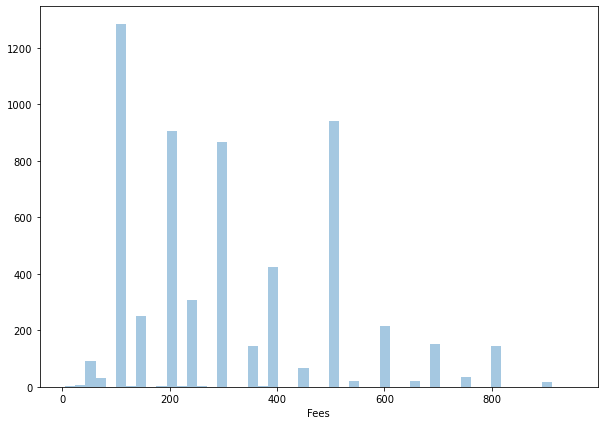

In [126]:
#checking the distribution of Fees
plt.figure(figsize=(10,7))
sns.distplot(train_new['Fees'],bins=50,kde=False)
plt.show()

From the above graph we can see that most of the doctor's fee is 100, than 500 and least at around 10-20 and 170-180, the fees data is rightly skewed.

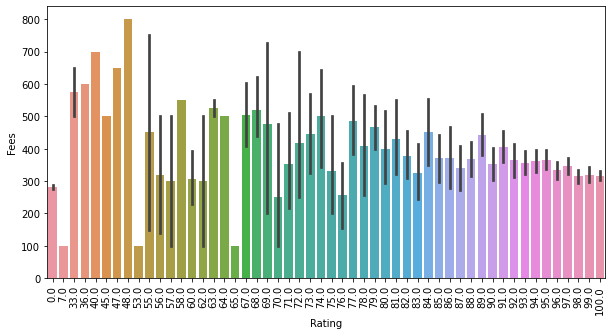

In [127]:
plt.figure(figsize=(10,5))
sns.barplot(x=train_new['Rating'],y=train_new['Fees'])
plt.xticks(rotation=90)
plt.show()

Here we can see that there is a downsloping relation, as the rating increases the fee decreases. 
it might be possible that Rating does depends on the fees, as if a doctor charges less fee then obviously payient would rate him / her more.

Text(0.5, 0.98, 'Ayurveda - Profile/Qualifications')

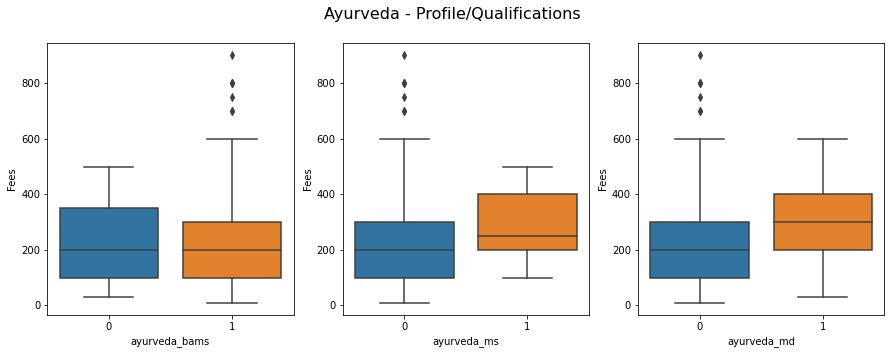

In [128]:
#checking relation of fee with qualifications of each profile. By this I will check fees as per the qualification in each
#profile

# Ayurveda
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x="ayurveda_bams", y="Fees", data=train_new[train_new['Profile']=='Ayurveda'], ax=ax[0])
sns.boxplot(x="ayurveda_ms", y="Fees", data=train_new[train_new['Profile']=='Ayurveda'], ax=ax[1])
sns.boxplot(x="ayurveda_md", y="Fees", data=train_new[train_new['Profile']=='Ayurveda'], ax=ax[2])
fig.suptitle('Ayurveda - Profile/Qualifications', fontsize=16)


in Ayurveda BAMS = median fees is 200 for both having BAMS qualification or not, however the one with having the qualification
ranging above. It ranges from 10-600, ans it seems that there might be some outliers.

in Ayurveda MS = with MS wualfication fee ranges from 100 to 500 with mean fee of 250. And with no qualification
fee ranges from 0 to 600, with mean fee of 200.

in Ayurveda MD =  with MS wualfication fee ranges from 50 to 600 with mean fee of 300. And with no qualification
fee ranges from 0 to 600, with mean fee of 200.

We can see that as compared with Degree MS and MD have higher fee than of a BAMS

Text(0.5, 0.98, 'Dentist - Profile/Qualifications')

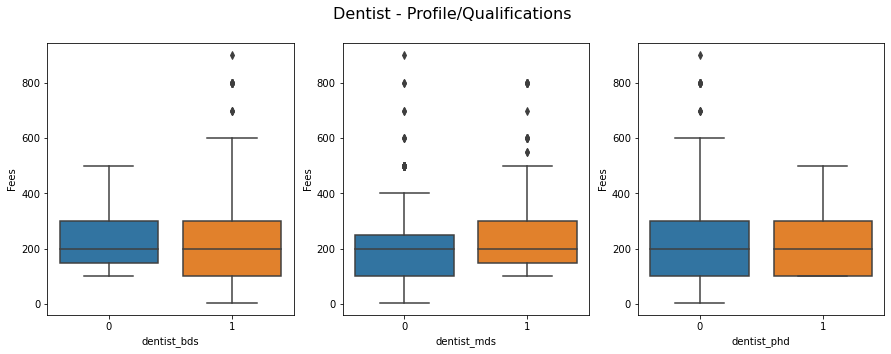

In [129]:
#Dentist with BDS , MDS ,PhD
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x="dentist_bds", y="Fees", data=train_new[train_new['Profile']=='Dentist'], ax=ax[0])
sns.boxplot(x="dentist_mds", y="Fees", data=train_new[train_new['Profile']=='Dentist'], ax=ax[1])
sns.boxplot(x="dentist_phd", y="Fees", data=train_new[train_new['Profile']=='Dentist'], ax=ax[2])
fig.suptitle('Dentist - Profile/Qualifications', fontsize=16)

Here we can see that the person with BDS qualification charging more then other 2.
BDS = ranges from 0 to 600, there are some who charges more than 600.
MDS = Ranges from 100 to 500
PhD = ranges from 100 to 500

median fees for every qualification is 200

Text(0.5, 0.98, 'Dermatologists - Profile/Qualifications')

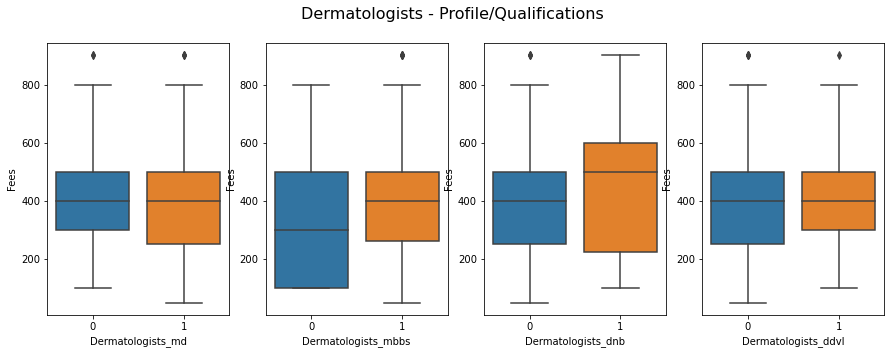

In [130]:
#Dermatologists
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
sns.boxplot(x="Dermatologists_md", y="Fees", data=train_new[train_new['Profile']=='Dermatologists'], ax=ax[0])
sns.boxplot(x="Dermatologists_mbbs", y="Fees", data=train_new[train_new['Profile']=='Dermatologists'], ax=ax[1])
sns.boxplot(x="Dermatologists_dnb", y="Fees", data=train_new[train_new['Profile']=='Dermatologists'], ax=ax[2])
sns.boxplot(x="Dermatologists_ddvl", y="Fees", data=train_new[train_new['Profile']=='Dermatologists'], ax=ax[3])
fig.suptitle('Dermatologists - Profile/Qualifications', fontsize=16)

Here we can see that DNB have higher fees ranging from 100 to 900.

Text(0.5, 0.98, 'ENT Specialist - Profile/Qualifications')

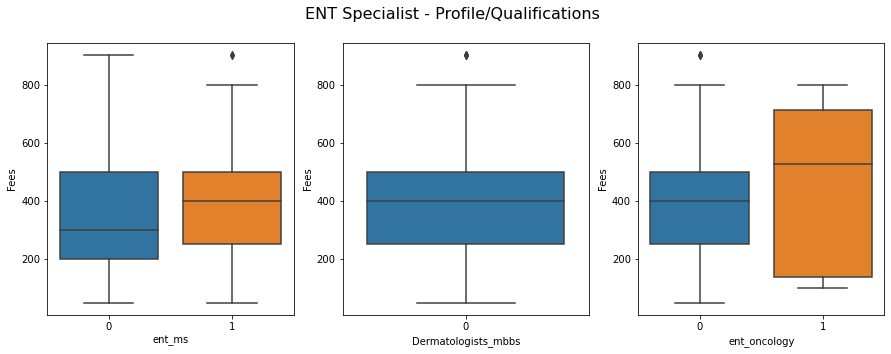

In [131]:
#ENT SPECIALIST
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x="ent_ms", y="Fees", data=train_new[train_new['Profile']=='ENT Specialist'], ax=ax[0])
sns.boxplot(x="Dermatologists_mbbs", y="Fees", data=train_new[train_new['Profile']=='ENT Specialist'], ax=ax[1])
sns.boxplot(x="ent_oncology", y="Fees", data=train_new[train_new['Profile']=='ENT Specialist'], ax=ax[2])
fig.suptitle('ENT Specialist - Profile/Qualifications', fontsize=16)

here we can see that every ENT epecialist is having a MBBS degree, and Oncology ones having higher fees.

Text(0.5, 0.98, 'Homeopathy - Profile/Qualifications')

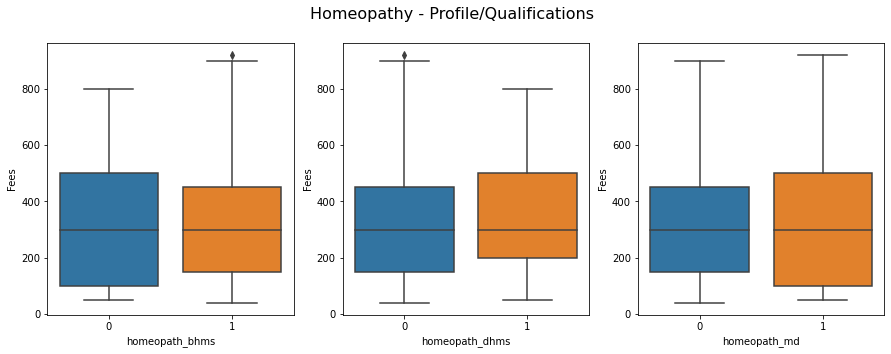

In [132]:
#Homeopath
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x="homeopath_bhms", y="Fees", data=train_new[train_new['Profile']=='Homeopath'], ax=ax[0])
sns.boxplot(x="homeopath_dhms", y="Fees", data=train_new[train_new['Profile']=='Homeopath'], ax=ax[1])
sns.boxplot(x="homeopath_md", y="Fees", data=train_new[train_new['Profile']=='Homeopath'], ax=ax[2])
fig.suptitle('Homeopathy - Profile/Qualifications', fontsize=16)

There is not so much variation, median for all are same at 300 and minimum at 50.

Text(0.5, 0.98, 'General medicine - Profile/Qualifications')

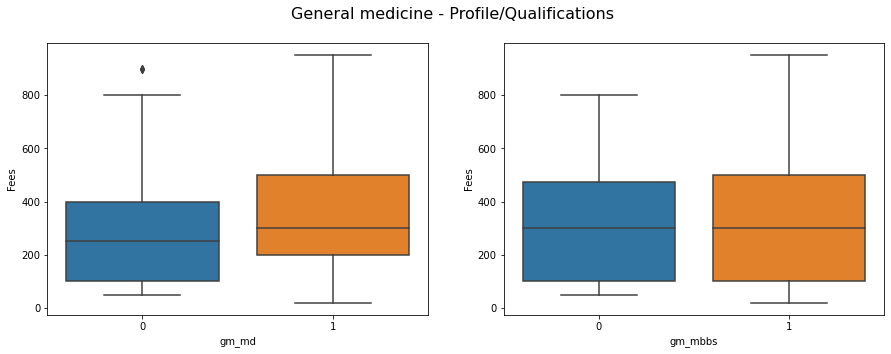

In [133]:
#General medicine
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x="gm_md", y="Fees", data=train_new[train_new['Profile']=='General Medicine'], ax=ax[0])
sns.boxplot(x="gm_mbbs", y="Fees", data=train_new[train_new['Profile']=='General Medicine'], ax=ax[1])
fig.suptitle('General medicine - Profile/Qualifications', fontsize=16)

here again there is not much variance to find.

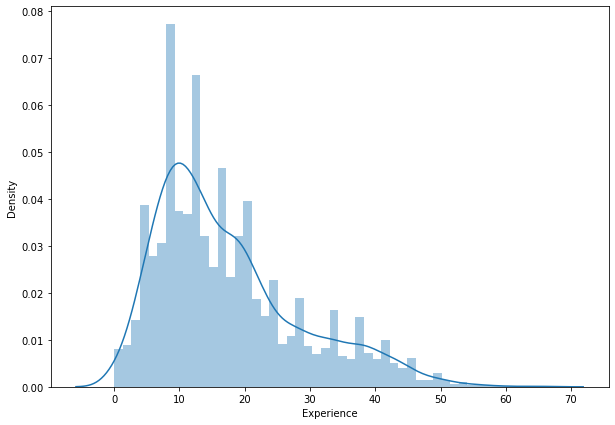

In [134]:
#checking distribution on Experiance
plt.figure(figsize=(10,7))
sns.distplot(train_new['Experience'],bins=50)
plt.show()

we can see an abnormal distribution here,doctors with an experience with 5 to 20 years are more, and as the experience increases number of doctors reduces.


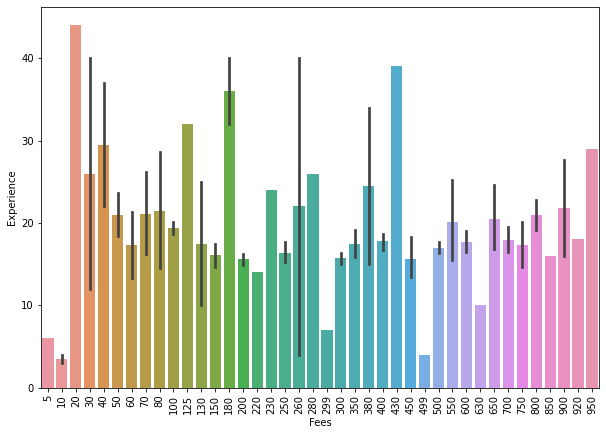

In [135]:
#checking the fee wrt experience
plt.figure(figsize=(10,7))
sns.barplot(x=train_new['Fees'],y=train_new['Experience'])
plt.xticks(rotation=90)
plt.show()

here is no patter to look at, doctors with experience more than 40 years are charginf 20 only, where doctors with 4-5 years of experience charging 499.
It seems that Fee is much more correlated to Profile and qualification.

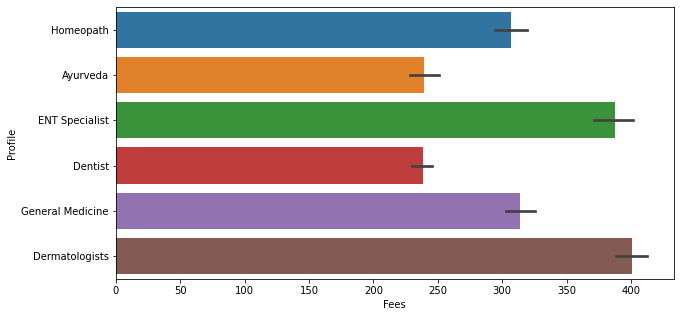

In [136]:
#checking relation ship of Fees and Profile

plt.figure(figsize=(10,5))
sns.barplot(x=train_new['Fees'],y=train_new['Profile'])
plt.show()

from the above graph we can get an idea that doctors with having expertise as an ENT specialist and Dermatologist have higher fees, where Dentist and Ayurveda being the minimum.

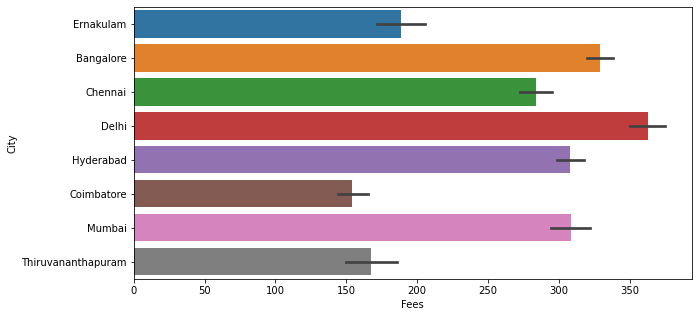

In [137]:
#checking the relation between city and fees
plt.figure(figsize=(10,5))
sns.barplot(x=train_new['Fees'],y=train_new['City'])
plt.show()

We can see that in Delhi the price are higher followed by banglore, Hydrabad and Mumbai's average fees is 300, minimum at coimbatore at 150. 

In [138]:
#I will remove the Area column, as I have already extracted the city which is categorical variable, I will be able to use 
#label encoding for city column, where as in Area we will have many unique values, and thus it will create
#complexity for our model.
train_new.drop('Area',axis=1,inplace=True)
test_new.drop('Area',axis=1,inplace=True)

In [139]:
train_new.head()

,Experience,Rating,Profile,Fees,City,ayurveda_bams,ayurveda_ms,ayurveda_md,ayurveda_gams,dentist_bds,dentist_mds,dentist_phd,Dermatologists_mbbs,Dermatologists_md,Dermatologists_dnb,Dermatologists_ddvl,ent_ms,ent_otorhinolaryngology,ent_oncology,homeopath_bhms,homeopath_dhms,homeopath_md,gm_md,gm_mbbs
0,24,100.0,Homeopath,100,Ernakulam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,12,98.0,Ayurveda,350,Bangalore,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0.0,ENT Specialist,300,Bangalore,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,12,0.0,Ayurveda,250,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,100.0,Ayurveda,250,Chennai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# LABEL ENCODING IN TRAIN AND TEST DATA

In [140]:
from sklearn.preprocessing import LabelEncoder

In [141]:
le = LabelEncoder()

In [142]:
train_new['Profile'] = le.fit_transform(train_new['Profile'])
test_new['Profile'] = le.fit_transform(test_new['Profile'])
train_new['City'] = le.fit_transform(train_new['City'])
test_new['City'] = le.fit_transform(test_new['City'])

In [150]:
#Now I can see that we have exctracted many columns from qualification, we have extracted degree type columns 
#and inputted values as 1 and 0, I am now adding up all the cols and form a new col named as qual, 
#it will show the maximum number of qualification a doctor has.
#this is done to reduce the curse of dimentinality
train_new['qual'] = train_new['ayurveda_bams']+train_new['ayurveda_gams']+train_new['ayurveda_md']+train_new['ayurveda_ms']+train_new['dentist_bds']+train_new['dentist_mds']+train_new['dentist_phd']+train_new['Dermatologists_ddvl']+train_new['Dermatologists_dnb']+train_new['Dermatologists_mbbs']+train_new['Dermatologists_md']+train_new['ent_ms']+train_new['ent_oncology']+train_new['ent_otorhinolaryngology']+train_new['homeopath_bhms']+train_new['homeopath_dhms']+train_new['homeopath_md']+train_new['gm_mbbs']+train_new['gm_md']

In [153]:
train_new.drop(['ayurveda_bams','ayurveda_ms','ayurveda_md','ayurveda_gams','dentist_bds','dentist_mds','dentist_phd','Dermatologists_mbbs','Dermatologists_md','Dermatologists_dnb','Dermatologists_ddvl','ent_ms','ent_otorhinolaryngology','ent_oncology','homeopath_bhms','homeopath_dhms','homeopath_md','gm_md','gm_mbbs'],axis=1,inplace=True)

In [154]:
train_new.head()

,Experience,Rating,Profile,Fees,City,qual
0,24,100.0,5,100,4,2
1,12,98.0,0,350,0,2
2,9,0.0,3,300,0,2
3,12,0.0,0,250,0,1
4,20,100.0,0,250,1,1


In [155]:
#doing same for test data
test_new['qual'] = test_new['ayurveda_bams']+test_new['ayurveda_gams']+test_new['ayurveda_md']+test_new['ayurveda_ms']+test_new['dentist_bds']+test_new['dentist_mds']+test_new['dentist_phd']+test_new['Dermatologists_ddvl']+test_new['Dermatologists_dnb']+test_new['Dermatologists_mbbs']+test_new['Dermatologists_md']+test_new['ent_ms']+test_new['ent_oncology']+test_new['ent_otorhinolaryngology']+test_new['homeopath_bhms']+test_new['homeopath_dhms']+test_new['homeopath_md']+test_new['gm_mbbs']+test_new['gm_md']
test_new.drop(['ayurveda_bams','ayurveda_ms','ayurveda_md','ayurveda_gams','dentist_bds','dentist_mds','dentist_phd','Dermatologists_mbbs','Dermatologists_md','Dermatologists_dnb','Dermatologists_ddvl','ent_ms','ent_otorhinolaryngology','ent_oncology','homeopath_bhms','homeopath_dhms','homeopath_md','gm_md','gm_mbbs'],axis=1,inplace=True)
test_new.head()

,Experience,Rating,Profile,City,qual
5961,35,0.0,4,6,1
5962,31,0.0,3,5,1
5963,40,70.0,2,1,2
5964,0,0.0,0,3,1
5965,16,100.0,1,0,2


# SPLITTING INTO INPUT AND OUTPUT

In [156]:
X = train_new.drop('Fees',axis=1)
X.head()

,Experience,Rating,Profile,City,qual
0,24,100.0,5,4,2
1,12,98.0,0,0,2
2,9,0.0,3,0,2
3,12,0.0,0,0,1
4,20,100.0,0,1,1


In [157]:
Y = train_new['Fees']
Y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [158]:
#scaling my X data (input data)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc = pd.DataFrame(X_sc)

In [159]:
X_sc.head()

,0,1,2,3,4
0,0.596446,1.216397,1.538887,0.410710,1.017966
1,-0.483607,1.174165,-1.471141,-1.332256,1.017966
2,-0.753620,-0.895222,0.334876,-1.332256,1.017966
3,-0.483607,-0.895222,-1.471141,-1.332256,-0.796098
4,0.236428,1.216397,-1.471141,-0.896514,-0.796098


In [160]:
#now building model
#importing all model libraries and their metrics and other libraries
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [166]:
model = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),
        AdaBoostRegressor()]

for m in model:
    print('model name :', m)
    m.fit(X_sc,Y)
    print('Model score :', m.score(X_sc,Y))
    m_pred = m.predict(X_sc)
    print('RMSE in train:', np.sqrt(mean_squared_error(Y,m_pred)))
    print('\n','**********','\n')

model name : LinearRegression()
Model score : 0.06930443888465654
RMSE in train: 184.1038785855002

 ********** 

model name : RandomForestRegressor()
Model score : 0.6910072545244921
RMSE in train: 106.0799382730233

 ********** 

model name : GradientBoostingRegressor()
Model score : 0.23099524691100837
RMSE in train: 167.34919546165204

 ********** 

model name : AdaBoostRegressor()
Model score : 0.12854559006538369
RMSE in train: 178.14820578948277

 ********** 



Above we can see that Random forest classifier is performing well, I will be creating our final model with train_new and test_new using random forest regressor.

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
x_train,x_test,y_train,y_test=train_test_split(X_sc,Y,test_size=0.2,random_state=0)
print('shape of x_train = ', x_train.shape)
print('shape of x_test = ', x_test.shape)
print('shape of y_train = ', y_train.shape)
print('shape of y_test = ', y_test.shape)

shape of x_train =  (4748, 5)
shape of x_test =  (1188, 5)
shape of y_train =  (4748,)
shape of y_test =  (1188,)


In [169]:
rfr = RandomForestRegressor()

In [171]:
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
r2_scr = r2_score(y_test,rfr_pred)

print('\n')
print('############')
print('Model accuracy:' , rfr.score(x_train,y_train))

print("Model's R2 Score :", r2_scr)
print("Model's MSE :", mean_squared_error(y_test,rfr_pred))
print("Model's MAE :",mean_absolute_error(y_test,rfr_pred))
print("Model's Root MSE :", np.sqrt(mean_squared_error(y_test,rfr_pred)))



############
Model accuracy: 0.7133415256702309
Model's R2 Score : 0.017367977926874723
Model's MSE : 35753.62578400105
Model's MAE : 144.85910784138233
Model's Root MSE : 189.08629189870177


# Predicting our Test data set

In [172]:
train_new.head()

,Experience,Rating,Profile,Fees,City,qual
0,24,100.0,5,100,4,2
1,12,98.0,0,350,0,2
2,9,0.0,3,300,0,2
3,12,0.0,0,250,0,1
4,20,100.0,0,250,1,1


In [173]:
test_new.head()

,Experience,Rating,Profile,City,qual
5961,35,0.0,4,6,1
5962,31,0.0,3,5,1
5963,40,70.0,2,1,2
5964,0,0.0,0,3,1
5965,16,100.0,1,0,2


In [176]:
# we would need to sclae the test data as well, just like we did for train data' input.

test_new = sc.fit_transform(test_new)
test_new = pd.DataFrame(test_new)
test_new.head()

,0,1,2,3,4
0,1.505610,-0.904367,0.899509,1.315316,-0.820254
1,1.152826,-0.904367,0.295671,0.873532,-0.820254
2,1.946590,0.576009,-0.308168,-0.893603,1.015818
3,-1.581251,-0.904367,-1.515845,-0.010035,-0.820254
4,-0.170115,1.210456,-0.912007,-1.335387,1.015818


In [177]:
X_sc.head()

,0,1,2,3,4
0,0.596446,1.216397,1.538887,0.410710,1.017966
1,-0.483607,1.174165,-1.471141,-1.332256,1.017966
2,-0.753620,-0.895222,0.334876,-1.332256,1.017966
3,-0.483607,-0.895222,-1.471141,-1.332256,-0.796098
4,0.236428,1.216397,-1.471141,-0.896514,-0.796098


In [175]:
Y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [178]:
test_prediction = rfr.predict(test_new)
test_prediction

array([248.21071429, 298.6       , 462.5       , ..., 313.3       ,
       186.        , 356.41012737])

In [181]:
test_prediction = pd.DataFrame(test_prediction)

In [182]:
#saving predicted results in csv
test_prediction.index = test_new.index # its important for comparison
test_prediction.columns = ["prediction"]
test_prediction.to_csv("prediction_results.csv")

In [184]:

#saving the model
import joblib
joblib.dump(rfr.predict,'Doctor_fee.pkl')

['Doctor_fee.pkl']